In [1]:
import ROOT as r

Welcome to JupyROOT 6.12/06


### First lets open up the file and get the triples spectrum for all calorimeters

---

In [3]:
f = r.TFile("/home/jlab/g-2/slidingScaleFits/data/EndGame4042BFinalRandNon_pileup_corrected.root")
f.cd("clustersAndCoincidences")
f.ls()

TFile**		/home/jlab/g-2/slidingScaleFits/data/EndGame4042BFinalRandNon_pileup_corrected.root	
 TFile*		/home/jlab/g-2/slidingScaleFits/data/EndGame4042BFinalRandNon_pileup_corrected.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences
   KEY: TH3D	uncorrected;1	uncorrected
   KEY: TH3D	corrected;1	corrected
   KEY: TH2I	triples;1	triples
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences


In [4]:
h = f.Get("clustersAndCoincidences/triples").Clone()
h.SetDirectory(0)

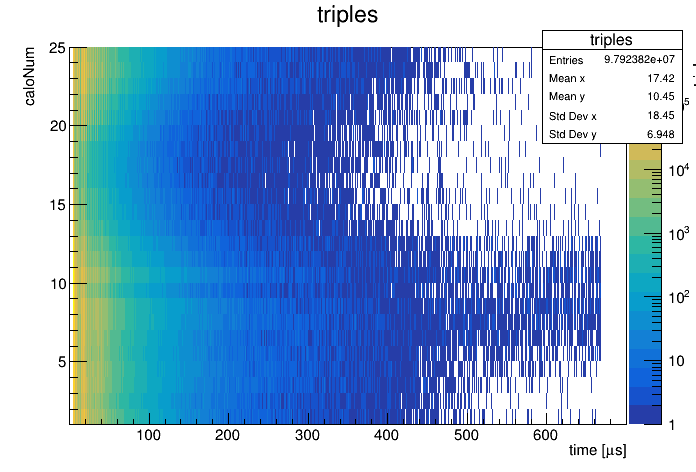

In [6]:
c = r.TCanvas()
h.Draw("colz")
c.SetLogz()
c.Draw()

---

### We can see that muon losses differ significantly around the ring. Lets pick the calorimeters behind the trackers, in the hopes that it will be most representative of the behaviour you're seeing in the tracker data.

It could also be that the calo muon loss spectrum isn't that representative of the tracker one... If that's the case, then we can try soemthing different.

In [45]:
calos = [13, 19]

#make an empty TH1 to draw into
h_triples = h.ProjectionX().Clone("L(t)")
h_triples.Reset()
h_triples.SetTitle("Triples in Calos: "+str(calos))

#draw the spectrum for our calos into it
for calo in calos:
    hi = h.ProjectionX("",h.GetYaxis().FindBin(calo),h.GetYaxis().FindBin(calo))
    h_triples.Add(hi)

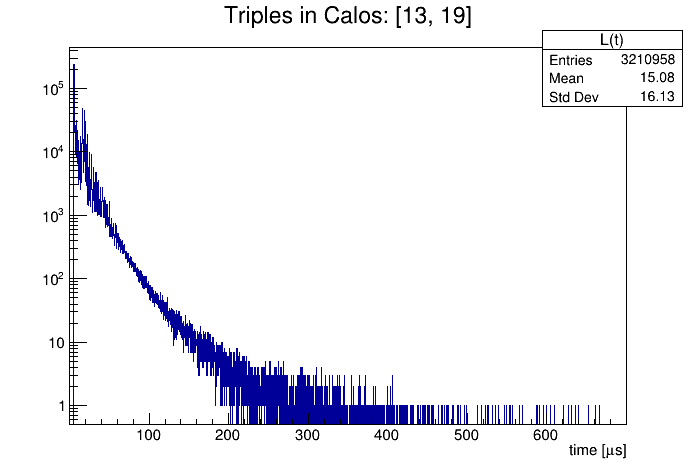

In [46]:
c = r.TCanvas()
c.SetLogy()
h_triples.Draw()
c.Draw()

---

### Now lets go ahead and build our muon loss function. To do that, we'll need an intial guess for our tau

In [16]:
tau = 64.4

### And now we can calculate

In [47]:
h_triples_1 = h_triples.Clone("L(t)exp(t/tau)")
h_triples_1.SetLineColor(2)
h_triples_1.Reset()

h_triples_2 = h_triples.Clone("Int_L(t)exp(t/tau)")
h_triples_2.SetLineColor(6)
h_triples_2.Reset()

for bini in range(1, h_triples.GetNbinsX()+1):
    bincenter = h_triples.GetXaxis().GetBinCenter(bini)
    content = h_triples.GetBinContent(bini)*r.TMath.Exp(bincenter / tau)
    h_triples_1.SetBinContent(bini, content )
    integral = h_triples_1.Integral(1, bini)
    h_triples_2.SetBinContent(bini, integral )

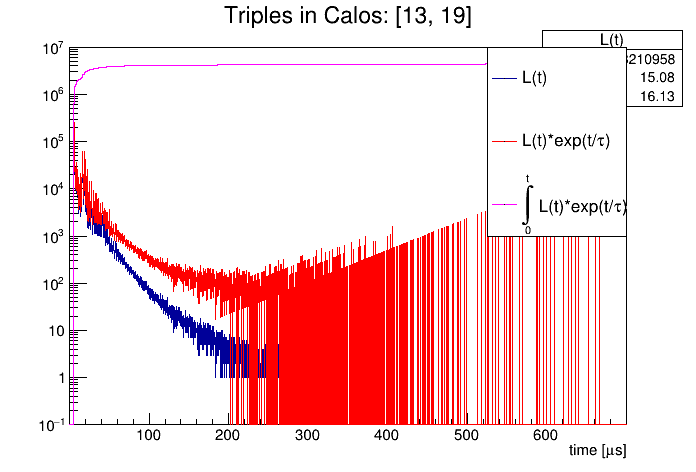

In [48]:
c = r.TCanvas()
c.SetLogy()
h_triples.Draw("HIST")
h_triples_1.Draw("HIST SAME")
h_triples_2.Draw("HIST SAME")

h_triples.GetYaxis().SetRangeUser(0.1,10**7)

leg = r.TLegend(0.7,0.5,0.9,0.9)
leg.AddEntry(h_triples,"L(t)")
leg.AddEntry(h_triples_1,"L(t)*exp(t/#tau)")
leg.AddEntry(h_triples_2,"#int_{0}^{t} L(t)*exp(t/#tau)")
leg.Draw()

c.Draw()

In [50]:
fout = r.TFile("./muon_loss_spectrum_endgame.root","RECREATE")
h_triples.Write()
h_triples_1.Write()
h_triples_2.Write()
fout.Close()